In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cust_satisfaction.csv")
# print(df)
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [3]:
#loss function -> single function ke andar error nikalna
#cost function -> multiple ke andar error nikalna

#evaluation metrices -->MSE,RMS for linear regression to check performance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
df.duplicated().sum()
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103899    False
103900    False
103901    False
103902    False
103903    False
Length: 103904, dtype: bool

In [6]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(172)

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [9]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [10]:
#balance the dataset
loyal_customer=df[df["Customer Type"]=="Loyal Customer"]
disloyal_customer=df[df["Customer Type"]=="disloyal Customer"]

In [11]:
loyal_customer=loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [12]:
balance_df=pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
11690,Female,Loyal Customer,Business travel,Business,satisfied,50,733,5,5,3,12,29.0
42794,Male,Loyal Customer,Business travel,Business,satisfied,49,3913,4,4,1,3,5.0
73136,Male,Loyal Customer,Business travel,Business,satisfied,25,1818,4,5,4,5,0.0
90281,Male,Loyal Customer,Business travel,Business,satisfied,45,707,4,4,4,0,0.0
73282,Male,Loyal Customer,Business travel,Business,satisfied,58,425,5,5,4,0,2.0


In [13]:
cat_col=balance_df.select_dtypes(include="O")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
11690,Female,Loyal Customer,Business travel,Business,satisfied
42794,Male,Loyal Customer,Business travel,Business,satisfied
73136,Male,Loyal Customer,Business travel,Business,satisfied
90281,Male,Loyal Customer,Business travel,Business,satisfied
73282,Male,Loyal Customer,Business travel,Business,satisfied


In [14]:
num_col=balance_df.select_dtypes(exclude="O")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
11690,50,733,5,5,3,12,29.0
42794,49,3913,4,4,1,3,5.0
73136,25,1818,4,5,4,5,0.0
90281,45,707,4,4,4,0,0.0
73282,58,425,5,5,4,0,2.0


In [15]:
pd.get_dummies(cat_col) #we do not reqiure ech 2 colum we can understand by one column 
                        #isliye apan ne drop if binary likha hau

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
11690,True,False,True,False,True,False,True,False,False,False,True
42794,False,True,True,False,True,False,True,False,False,False,True
73136,False,True,True,False,True,False,True,False,False,False,True
90281,False,True,True,False,True,False,True,False,False,False,True
73282,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
103892,True,False,False,True,True,False,True,False,False,True,False
103895,True,False,False,True,True,False,False,True,False,True,False
103899,True,False,False,True,True,False,False,True,False,True,False
103901,False,True,False,True,True,False,True,False,False,True,False


In [16]:
pd.get_dummies(cat_col,drop_first=True) #ab ek hi column ayega

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
11690,False,False,False,False,False,True
42794,True,False,False,False,False,True
73136,True,False,False,False,False,True
90281,True,False,False,False,False,True
73282,True,False,False,False,False,True
...,...,...,...,...,...,...
103892,False,True,False,False,False,False
103895,False,True,False,True,False,False
103899,False,True,False,True,False,False
103901,True,True,False,False,False,False


In [17]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe=OneHotEncoder(drop="if_binary") #object
cat_col_encoded=ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [18]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [19]:
one_hot=pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
one_hot=one_hot.reset_index(drop=True)
num_col=num_col.reset_index(drop=True)
final_df=pd.concat([one_hot,num_col],axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,50,733,5,5,3,12,29.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49,3913,4,4,1,3,5.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,25,1818,4,5,4,5,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,45,707,4,4,4,0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,58,425,5,5,4,0,2.0


In [ ]:
##save the file


In [22]:
x=final_df.drop("Customer Type_disloyal Customer",axis=1)
y=final_df[["Customer Type_disloyal Customer"]]

In [23]:
##split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,
    random_state=42
)

In [24]:
#model build
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\jatad\OneDrive\Desktop\python\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jatad\OneDrive\Desktop\python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.score(x_test,y_test)

0.8504048322837682

In [26]:
model.score(x_train,y_train)

0.8524289937026089

In [27]:
pred=model.predict(x_test)
y_test["prediction"]=pred
y_test

,Customer Type_disloyal Customer,prediction
18536,0.0,0.0
36240,1.0,1.0
5426,0.0,0.0
21679,1.0,1.0
18714,0.0,0.0
...,...,...
23667,1.0,1.0
9774,0.0,0.0
24880,1.0,1.0
38451,1.0,1.0


In [ ]:
##model performance check/evaluate
##regression--mse,mae,rmse
##classification -> confusion matrix,classification report

#ab isme apan logistic regression pd rhe hai to->classification k



In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test["Customer Type_disloyal Customer"],
y_test["prediction"])

array([[3462,  540],
       [ 624, 3155]])

<Axes: >

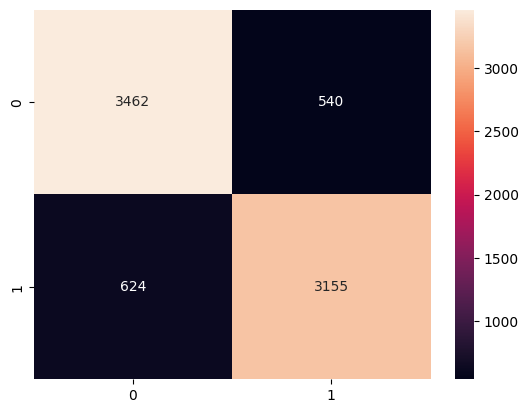

In [32]:
##graph  --heatmap
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],
y_test["prediction"]),annot=True,fmt="d")

In [33]:
##classification report
print(classification_report(y_test["Customer Type_disloyal Customer"],
y_test["prediction"]))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      4002
         1.0       0.85      0.83      0.84      3779

    accuracy                           0.85      7781
   macro avg       0.85      0.85      0.85      7781
weighted avg       0.85      0.85      0.85      7781



In [ ]:
##ROC curve
